In [48]:
import keras
from keras.layers import *
import matplotlib.pyplot as plt
import numpy as np
import keras.utils

In [49]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
type(x_train)

numpy.ndarray

In [52]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

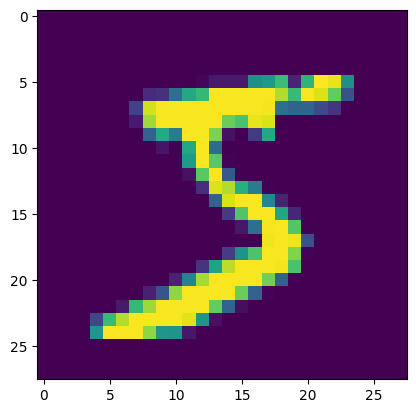

In [53]:
plt.imshow(x_train[0])

In [54]:
y_train[:15]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1], dtype=uint8)

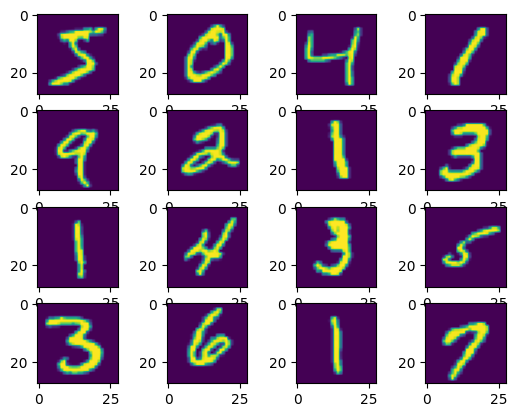

In [55]:
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(x_train[i])
plt.show()

In [56]:
input_shape = (28, 28, 1)

In [57]:
model_1 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50),
      Dense(1)
      ] )

In [58]:
model_1.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [59]:
%%time

history = model_1.fit(x_train, y_train, batch_size=32, epochs=5)

Epoch 1/5


/usr/local/lib/python3.10/dist-packages/tensorflow/python/util/dispatch.py:1260: SyntaxWarning: In loss categorical_crossentropy, expected y_pred.shape to be (batch_size, num_classes) with num_classes > 1. Received: y_pred.shape=(32, 1). Consider using 'binary_crossentropy' if you only have 2 classes.
  return dispatch_target(*args, **kwargs)


1875/1875 [==============================] - 5s 2ms/step - loss: 5.3095e-07 - accuracy: 0.0886
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.0886
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.0886
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 5.3095e-07 - accuracy: 0.0886
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 5.3095e-07 - accuracy: 0.0886
CPU times: user 26.6 s, sys: 1.28 s, total: 27.9 s
Wall time: 42 s


In [60]:
x_train = x_train / 255
x_test = x_test / 255

In [61]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [62]:
model_2 = keras.Sequential([
      keras.Input(shape=input_shape),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [63]:
model_2.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [64]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3264 - accuracy: 0.9094
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1669 - accuracy: 0.9510
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1250 - accuracy: 0.9629
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1016 - accuracy: 0.9698
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0847 - accuracy: 0.9752
CPU times: user 28.4 s, sys: 1.74 s, total: 30.1 s
Wall time: 42.3 s


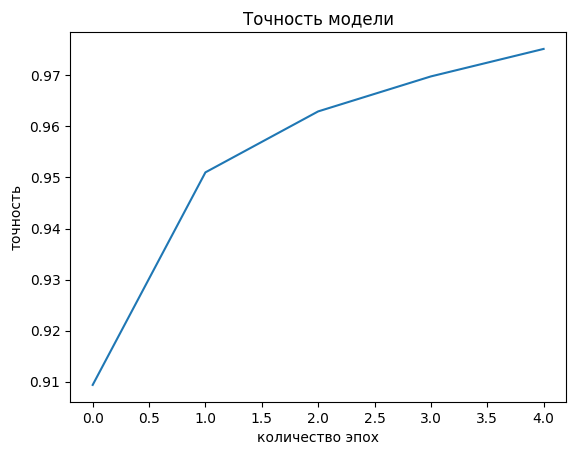

In [65]:
plt.plot(history.history['accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.show()

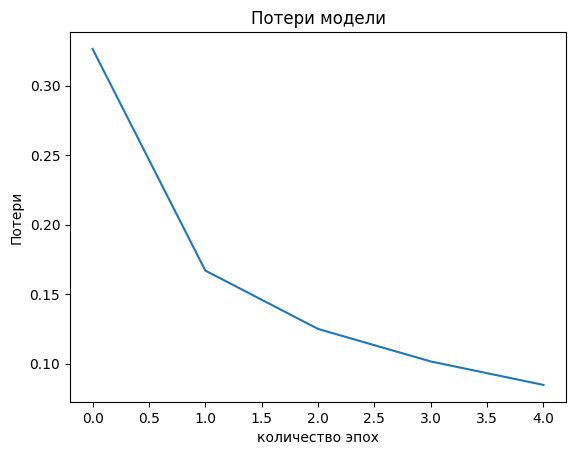

In [66]:
plt.plot(history.history['loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.show()

In [67]:
model_2.evaluate(x_test, y_test_cat)

313/313 [==============================] - 2s 6ms/step - loss: 0.1030 - accuracy: 0.9688


[0.10301875323057175, 0.9688000082969666]

In [68]:
%%time

history = model_2.fit(x_train, y_train_cat, batch_size=32, epochs=5, validation_data =(x_test, y_test_cat) )

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0720 - accuracy: 0.9785 - val_loss: 0.1073 - val_accuracy: 0.9682
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0637 - accuracy: 0.9807 - val_loss: 0.0948 - val_accuracy: 0.9714
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0557 - accuracy: 0.9835 - val_loss: 0.0990 - val_accuracy: 0.9702
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0498 - accuracy: 0.9847 - val_loss: 0.0962 - val_accuracy: 0.9716
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0437 - accuracy: 0.9859 - val_loss: 0.1080 - val_accuracy: 0.9689
CPU times: user 35.2 s, sys: 2.02 s, total: 37.2 s
Wall time: 37.8 s


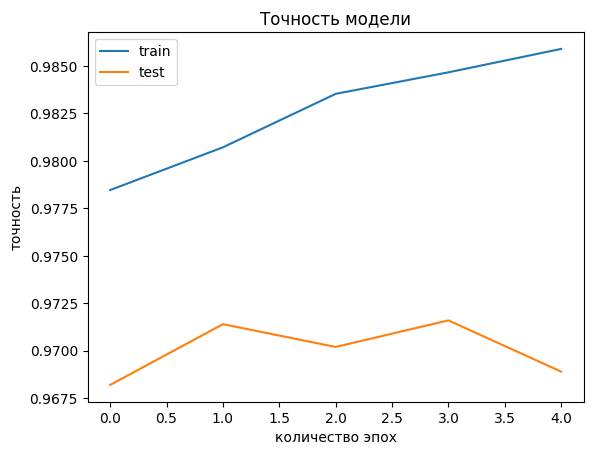

In [69]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Точность модели')
plt.ylabel('точность')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


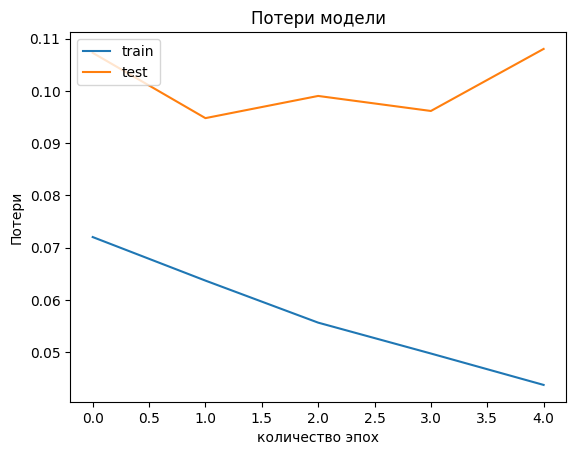

In [70]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Потери модели')
plt.ylabel('Потери')
plt.xlabel('количество эпох')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
from PIL import Image
filename = "/content/sample_data/test.jpg"

In [72]:
with Image.open(filename) as img:
    img.load()

In [73]:
MAX_SIZE = (28, 28)
img.thumbnail(MAX_SIZE)

In [74]:
img.save('pythonthumb.jpg')

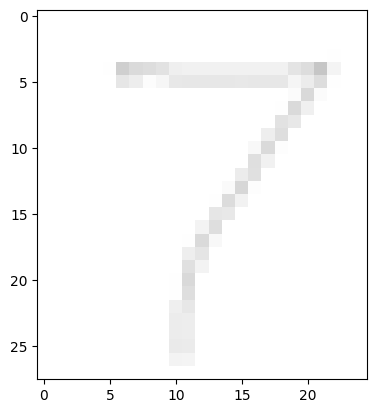

In [75]:
plt.imshow(img)

In [76]:
img = img.convert('L')
img = np.array(img)

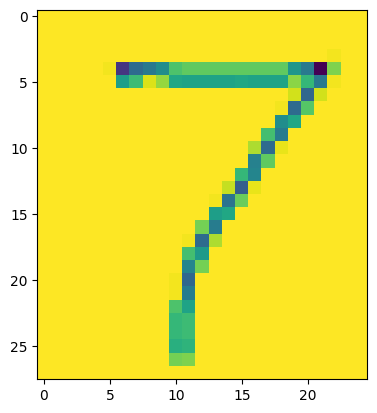

In [86]:
plt.imshow(img)

In [88]:
img = img.reshape(28,28,1)
img = img/255.0

ValueError: cannot reshape array of size 700 into shape (28,28,1)

In [84]:
model = keras.Sequential([
      keras.Input(shape=(28, 28, 1)),
      Flatten(),
      Dense(50,activation = 'relu'),
      Dense(10, activation = 'softmax')
      ] )

In [85]:
res = model.predict(img)
print(res)

ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_7" is incompatible with the layer: expected shape=(None, 1, 28, 28, 1), found shape=(None, 25)
